# 비정상 절차서 21-12 :  <font color=blue> PZR PORV(BB-PV444B/445A/445B) 열림

1 경보 및 증상

2 자동 동작사항

3 긴급 조치사항 

4 후속 조치사항 ㅇ

## <font color=blue>1.0 데이터 처리

In [1]:
import pickle
import matplotlib.pyplot as plt
from collections import deque
# with open('D:/CRONI_New_Interface/new_db_30mal/ab23_06_30004_(175).pkl', 'rb') as f:
with open('D:/이상현/9._.CNS_Platform(멀티 CNS 실행)/상현CNN/Data_pkl/ab21_12_37_(324).pkl', 'rb') as f:
    db = pickle.load(f)
sym_ch = {0:deque(maxlen=5), 1:deque(maxlen=5), 2:deque(maxlen=5), 3:deque(maxlen=5), 'CPPRZL':deque(maxlen=5), 'PPRZ':deque(maxlen=5)}

## <font color=blue>2.0 경보 및 증상

### <font color=blue>2.1 PZR PORV(BB-PV444B, 445A, 445B) 열림 지시 및 경보 발생 - <font color=green>만족
##### <font color=blue>◦ BB-HS444B, 445A, 445B 열림 지시
##### <font color=blue>◦ 경보명 : PZR PORV PV-444B OPENING
##### <font color=blue>           PZR PORV PV-445A OPENING
##### <font color=blue>           PZR PORV PV-445B OPENING
##### <font color=blue>           PZR PORV ACTUATION PRESS
##### <font color=blue>           (BB-PT444B, 445A, 445 : 164.2kg/㎠)

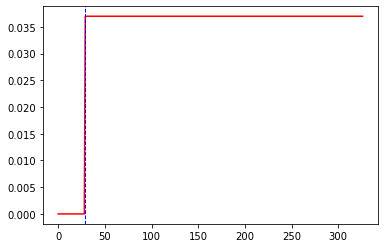

In [2]:
# BPORV = PORV Valve 포지션  
plt.plot(db['BPORV'], color='r') # PORV Valve 포지션  
vline = plt.axvline(29, color='b', linestyle='--', linewidth=1)

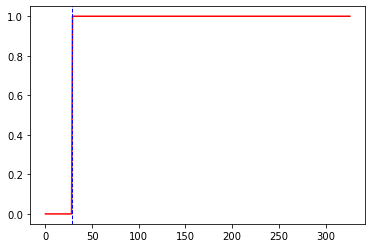

In [5]:
# KLAMPO309 = PORV OPENING 경보 
# KLAMPO112 = PORV OPEN signal
plt.plot(db['KLAMPO309'], color='r') #실제 압력
vline = plt.axvline(29, color='b', linestyle='--', linewidth=1)

In [4]:
PORV_Val = []
for i in range(len(db)):
    if i > 29:
        if db['BPORV'][i] != 0 and db['KLAMPO309'][i] == 1:
            PORV_Val.append(i)
if len(PORV_Val) == 0:
    print('증상을 만족하지 못했습니다.')
else:
    print(f'PORV OPEN 경보  : {PORV_Val[0]}초')

PORV OPEN 경보  : 31초


### <font color=blue>2.2 PZR PORV 출구 고온 지시(BB-TI463/464/466) 및 경보 발생   - <font color=red>불만족
##### <font color=blue>◦ 경보명 : PZR PWR RELIEF LN TEMP HIGH

<font color=red>REPORT
<font color=red>출구 고온 지시 변수와 경보 변수를 찾을 수 없음. 

### <font color=blue>2.3 PZR 저압력/보조전열기 켜짐 지시 및 경보 발생(155.4㎏/㎠) - <font color=green>만족
##### <font color=blue>◦ 경보명 : PZR PRESS LO/BACKUP HEATERS ON

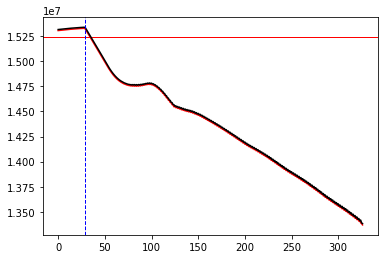

In [6]:
# KLAMPO308 : "PZR PRESS LOW"(BB-PT445) 경보
 # -> "PZR PRESS LOW"(BB-PT445) 경보 발생 확인
plt.plot(db['PPRZ'], color='r') #실제 압력
vline = plt.axhline(155.4*98067, color='r', linestyle='-', linewidth=1)
plt.plot(db['ZINST58']*98067, color='k') # 압력 지시치
vline = plt.axvline(29, color='b', linestyle='--', linewidth=1)

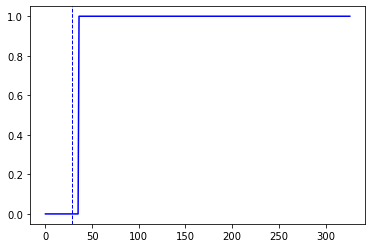

In [7]:
# QPRZB = 보조전열기 전원 확인 변수
plt.plot(db['QPRZB']*0.000001, color='b') # -> 보조전열기 전원 확인
vline = plt.axvline(29, color='b', linestyle='--', linewidth=1)

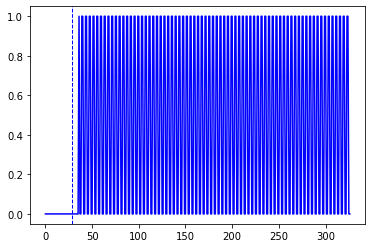

In [8]:
# KLAMPO312 = PZR PRESS LO/BACK UP HEATERS ON 경보 
plt.plot(db['KLAMPO312'], color='b')
vline = plt.axvline(29, color='b', linestyle='--', linewidth=1)

In [9]:
Back_heat_onoff = []
for i in range(len(db)):
    if i > 29:
        if db['PPRZN'][i] < db['CQPRZB'][i] and db['KBHON'][i]  == 1 :
            if db['KLAMPO312'][i]  == 1:
                Back_heat_onoff.append(i+1)
if len(Back_heat_onoff) == 0:
    print('증상을 만족하지 못했습니다.')
else:
    print(f' PZR 모든 전열기 작동 및 경보 발생 만족 시간 : {Back_heat_onoff[0]}초')

 PZR 모든 전열기 작동 및 경보 발생 만족 시간 : 37초


### <font color=blue>2.4 PZR 압력 보호채널(BB-PI455, 456, 457) ‘저’ 압력 연동 경보발생(153.6㎏/㎠) 및 PZR PORV 차단밸브(BB-HV005, 006, 007) 닫힘 - <font color=green>만족
##### <font color=blue>◦ 경보명 : PZR LO PRESS INTERLOCK

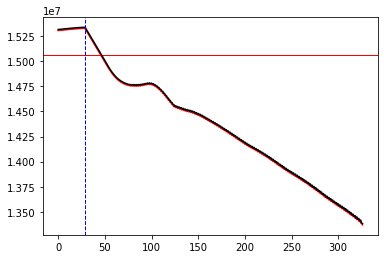

In [10]:
# KLAMPO308 : "PZR PRESS LOW"(BB-PT445) 경보
 # -> "PZR PRESS LOW"(BB-PT445) 경보 발생 확인
plt.plot(db['PPRZ'], color='r') #실제 압력
vline = plt.axhline(153.6*98067, color='r', linestyle='-', linewidth=1)
plt.plot(db['ZINST58']*98067, color='k') # 압력 지시치
vline = plt.axvline(29, color='b', linestyle='--', linewidth=1)

In [11]:
PRZ_low_int = []
for i in range(len(db)):
    if i > 29:
        if db['PPRZ'][i] < 153.6*98067:
            PRZ_low_int.append(i+1)
if len(PRZ_low_int) == 0:
    print('증상을 만족하지 못했습니다.')
else:
    print(f'가압기 "저" 지시 만족 시간 : {PRZ_low_int[0]}초')

가압기 "저" 지시 만족 시간 : 47초


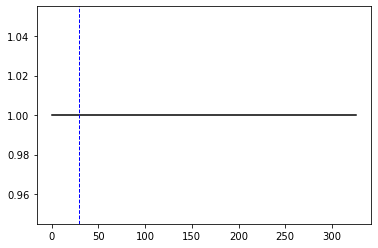

In [12]:
# BHV6 : PZR PORV 차단밸브
# "PZR LO PRESS INTERLOCK" 경보발생(153.6㎏/㎠) 없음
plt.plot(db['BHV6'], color='k') # -> PZR PORV 차단밸브 확인
vline = plt.axvline(29, color='b', linestyle='--', linewidth=1)

In [35]:
BHV6 = []
for i in range(len(db)):
    if i > 29:
        if db['BHV6'][i] == 1 and db['PPRZ'][i] < 153.6*98067:
            BHV6.append(i+1)
if len(BHV6) == 0:
    print('증상을 만족하지 못했습니다.')
else:
    print(f'BHV6 밸브 닫힘 증상 만족 시간 : {BHV6[0]}초')

BHV6 밸브 닫힘 증상 만족 시간 : 47초


### <font color=blue>2.5 PZR ‘저’ 압력 지시(BB-PI444, 445, 455, 456, 457) 및 경보발생(153.6㎏/㎠) - <font color=green>만족
##### <font color=blue>◦ 경보명 : PZR PRESS LOW(BB-PT445)

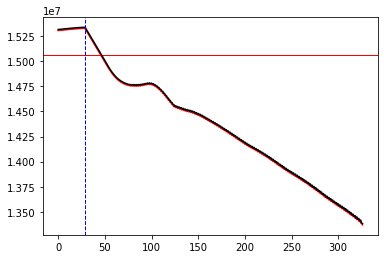

In [14]:
# KLAMPO308 : "PZR PRESS LOW"(BB-PT445) 경보
 # -> "PZR PRESS LOW"(BB-PT445) 경보 발생 확인
plt.plot(db['PPRZ'], color='r') #실제 압력
vline = plt.axhline(153.6*98067, color='r', linestyle='-', linewidth=1)
plt.plot(db['ZINST58']*98067, color='k') # 압력 지시치
vline = plt.axvline(29, color='b', linestyle='--', linewidth=1)

In [15]:
PRZ_low_int = []
for i in range(len(db)):
    if i > 29:
        if db['PPRZ'][i] < 153.6*98067:
            PRZ_low_int.append(i+1)
if len(PRZ_low_int) == 0:
    print('증상을 만족하지 못했습니다.')
else:
    print(f'가압기 "저" 지시 만족 시간 : {PRZ_low_int[0]}초')

가압기 "저" 지시 만족 시간 : 47초


### <font color=blue>2.6 PRT 고온(45℃), 고압(0.6㎏/㎠), 고수위(85%) 지시 및 경보 발생  - <font color=red>불만족
##### <font color=blue>◦ 경보명 : PZR RELIEF TANK TEMP HIGH
#####  <font color=blue>             PZR RELIEF TANK PRESS HIGH 
##### <font color=blue>              PZR RELIEF TANK LEVEL HI/LO

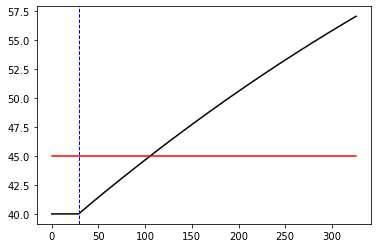

In [17]:
# UPRT : PRT temp
 #CUPRT: PRT temp hi 경계
plt.plot(db['UPRT'], color='k') 
plt.plot(db['CUPRT'], color='r')
vline = plt.axvline(29, color='b', linestyle='--', linewidth=1)

In [23]:
PRT_temp_hi = []
for i in range(len(db)):
    if i > 29:
        if db['UPRT'][i] > db['CUPRT'][i] and db['KLAMPO317'][i] == 1:
            PRT_temp_hi.append(i+1)
if len(PRT_temp_hi) == 0:
    print('증상을 만족하지 못했습니다.')
else:
    print(f'PRT 온도 "고" 경보 만족 시간 : {PRT_temp_hi[0]}초')

PRT 온도 "고" 경보 만족 시간 : 108초


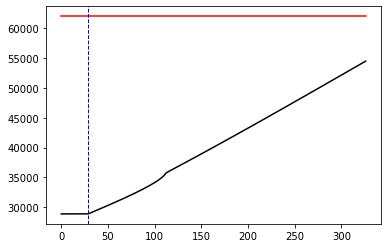

In [27]:
# PPRT : PRT press
 #CPPRT: PRT press hi 경계
plt.plot(db['PPRT'] - 0.98E5, color='k') 
plt.plot(db['CPPRT'], color='r')
vline = plt.axvline(29, color='b', linestyle='--', linewidth=1)

In [29]:
PRT_pre_hi = []
for i in range(len(db)):
    if i > 29:
        if db['PPRT'][i] - 0.98E5 > db['CPPRT'][i] and db['KLAMPO318'][i] == 1:
            PRT_pre_hi.append(i+1)
if len(PRT_pre_hi) == 0:
    print('증상을 만족하지 못했습니다.')
else:
    print(f'PRT 온도 "고" 경보 만족 시간 : {PRT_pre_hi[0]}초')

증상을 만족하지 못했습니다.


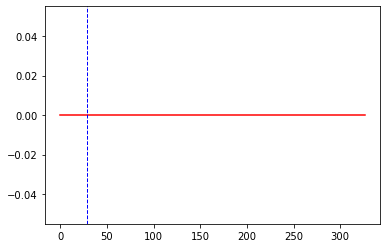

In [28]:
# KLAMPO318 : PRT press hi alram
plt.plot(db['KLAMPO318'], color='r')
vline = plt.axvline(29, color='b', linestyle='--', linewidth=1)

## <font color=blue>3.0 자동 동작사항

### <font color=blue>3.1 PZR 전열기 모두 켜짐(155.4㎏/㎠) - <font color=green>만족

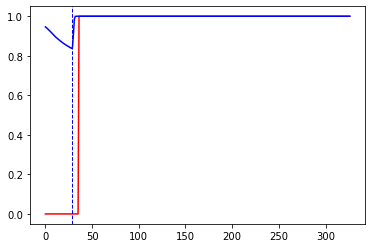

In [30]:
# QPRZB : 비례전열기 전원
# QPRZH : 보조전열기 전원
plt.plot(db['QPRZB']*0.000001, color='r') # -> 비례전열기 전원 확인
plt.plot(db['QPRZH'], color='b') # -> 보조전열기 전원 확인
vline = plt.axvline(29, color='b', linestyle='--', linewidth=1)

In [31]:
QPRZ_onoff = []
for i in range(len(db)):
    if i > 29:
        if db['QPRZB'][i]*0.000001 > 0.2 and db['QPRZH'][i] > 0.2 :
            QPRZ_onoff.append(i+1)
if len(QPRZ_onoff) == 0:
    print('증상을 만족하지 못했습니다.')
else:
    print(f' 모든 가압기 전열기 작동 만족 시간 : {QPRZ_onoff[0]}초')

 모든 가압기 전열기 작동 만족 시간 : 37초


### <font color=blue>3.2 PZR PORV 차단밸브(BB-HV005, 006, 007) 닫힘(153.6㎏/㎠) - <font color=green>만족

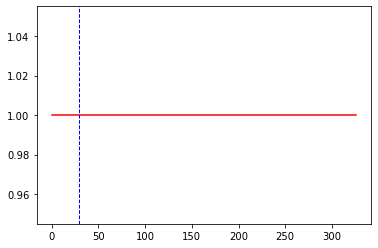

In [32]:
# BHV6 = PORV 차단 밸브 포지션  
plt.plot(db['BHV6'], color='r') # PORV 차단 밸브 포지션  
vline = plt.axvline(29, color='b', linestyle='--', linewidth=1)

In [34]:
BHV6 = []
for i in range(len(db)):
    if i > 29:
        if db['BHV6'][i] == 1:
            BHV6.append(i+1)
if len(BHV6) == 0:
    print('증상을 만족하지 못했습니다.')
else:
    print(f'BHV6 밸브 닫힘 증상 만족 시간 : {BHV6[0]}초')

BHV6 밸브 닫힘 증상 만족 시간 : 31초
